### Nathan's Portion: Nationality

Hypotheses:
1.  How the diversification of countries have changed over time
<br><span style="color:red"><b>Uncompleted</b></span>
2. Which sports have which nationalities and nationality density
<br><span style="color:green"><b>Completed</b></span>
3. Which countries are bringing in the percentage of earnings over time
<br><span style="color:green"><b>Completed</b></span>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf

df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df = df.rename(columns={'earnings ($ million)': 'earnings'})
df = df.rename(columns=lambda x: x.replace(' ', '_'))

df.loc[df['Sport'].str.contains('auto racing', case=False), 'Sport'] = 'racing'
df.loc[df['Sport'].str.contains('nascar', case=False), 'Sport'] = 'racing'
df.loc[df['Sport'].str.contains('f1', case=False), 'Sport'] = 'f1'

df.Sport=df.Sport.str.lower().replace('nba','basketball')

df.loc[df['Name']=='Deion Sanders','Sport'] = 'baseball'

df.columns = df.columns.str.lower()

df.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,racing,1990,10.0
4,5,Alain Prost,France,5,NaN,racing,1990,9.0


<b>Hypothesis 1:</b>
How diversification of countries have changed over time

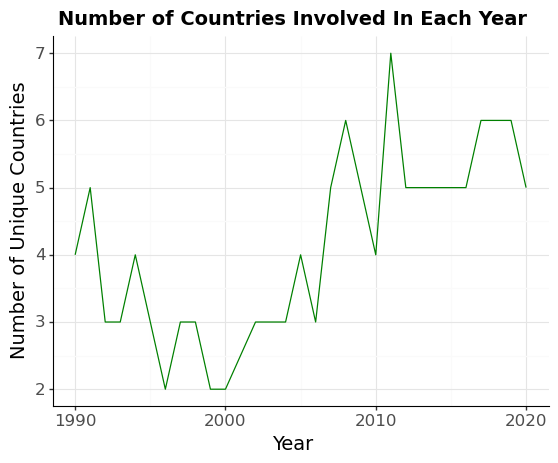

<ggplot: (8766444273990)>

In [210]:
# graph of number of unique countries in each year (countries per year)
cpy_graph = df.groupby(['year', 'nationality']).size()
cpy_df = cpy_graph.reset_index()
cpy_graph2 = cpy_df.groupby('year')['nationality'].count()
cpy_df2 = cpy_graph2.reset_index()
cpy_df2 = cpy_df2.rename(columns={'nationality': 'num_countries'})
# cpy_df2

(ggplot(cpy_df2, aes(x='year', y='num_countries'))
 + geom_line(color='green')
 + labs(title='Number of Countries Involved In Each Year', x='Year', y='Number of Unique Countries')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))


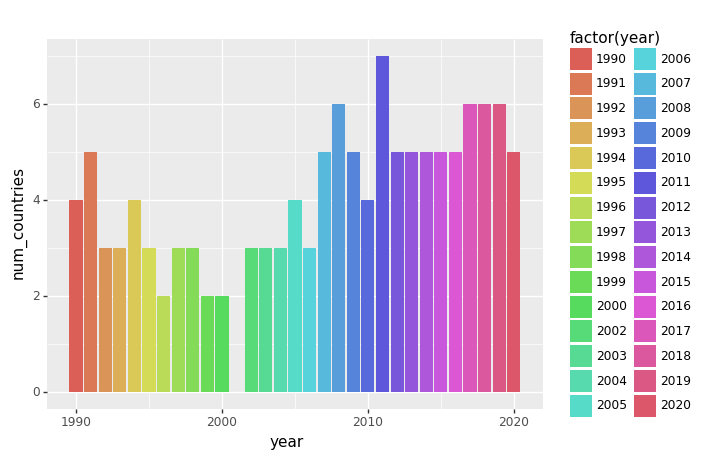

<ggplot: (8766422668270)>

In [228]:
# Let's visualize this another way

# (ggplot(cpy_df2, aes(x='year'))+
#  geom_histogram(fill='darkorange')+
#  theme_bw()
# )


cpy_df2


ggplot(cpy_df2, aes(x='year', y='num_countries', fill='factor(year)')) + \
    geom_bar(stat='identity')
    # scale_fill_manual(values=['green']) + \
    # labs(title='Green Bar Graph', x='X', y='Y')

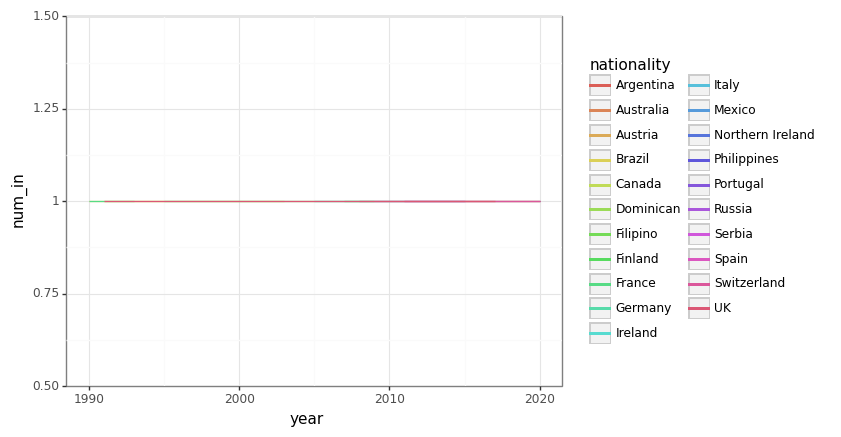

<ggplot: (8766457632784)>

In [238]:
# scatter plot with y on number from country in year and x as year
cpy_df = cpy_df.rename(columns={0: 'num_in'})

(ggplot(data=cpy_df.loc[cpy_df['nationality'] != 'USA'], mapping=aes(x='year', y='num_in', color='nationality'))+
 geom_line()+
 theme_bw())

This doesn't really say a lot because they all fluctuate between 1

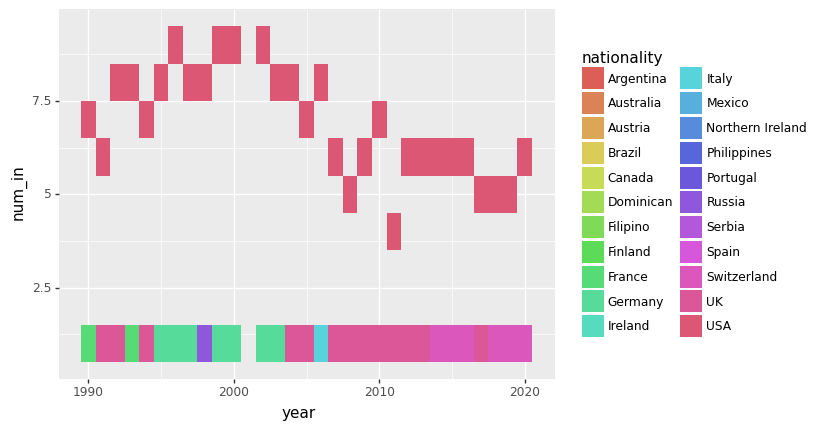

<ggplot: (8766389013450)>

In [240]:
(ggplot(data=cpy_df, mapping= aes(x='year', y='num_in', fill='nationality'))+
 geom_tile()
 )


Again, the problem is that these don't say anything about the non-USA countries, so let's create a bar graph of the number of years each country is in.

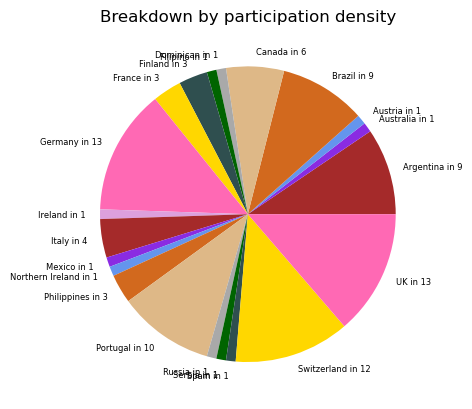

In [253]:
cpy_graph3 = cpy_df.loc[cpy_df['nationality'] != 'USA'].groupby('nationality')['num_in'].count()
cpy_df3 = cpy_graph3.reset_index()
# cpy_df3 = cpy_df3.rename(columns={'nationality': 'num_countries'})



colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]
labels = [f"{sport} in {num_in}"
          for sport, num_in in zip(cpy_df3["nationality"], cpy_df3['num_in'])]

plt.pie(cpy_df3['num_in'], labels=labels,
       colors=colors, textprops={"fontsize": 6})
plt.title("Breakdown by participation density")
plt.show()

With all of this data, it is possible to conclude that the number of countries involved in the highest earnings sports has increased over the years and continues to have a projected growth.

<b>Hypothesis 2:</b>
Which industries have which nationalities and national density?

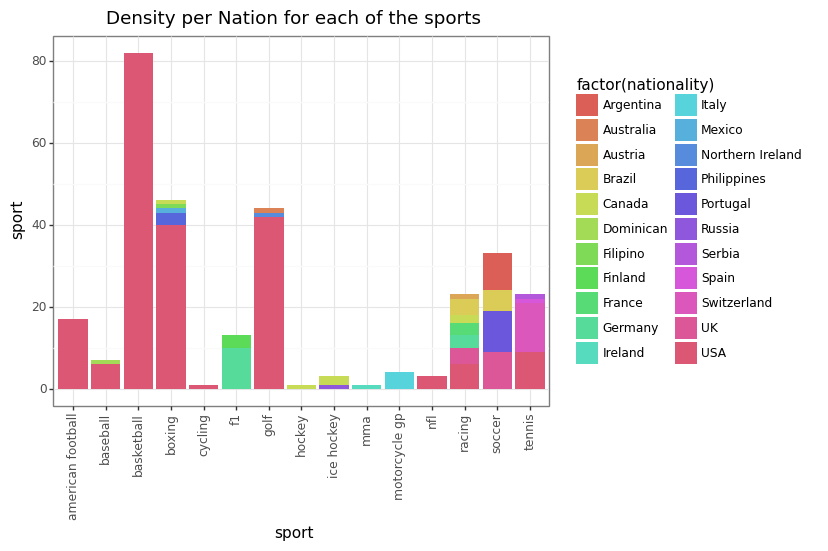

<ggplot: (8766444063805)>

In [277]:
# foreach sport, what countries make up the most

(ggplot(data=df, mapping=aes(x="sport", fill="factor(nationality)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Density per Nation for each of the sports")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

It is very clear from this that the United States dominates a large percentage of these categories. This brings about the <b>question...</b> of how much of each sport as a percentage does the US hold?

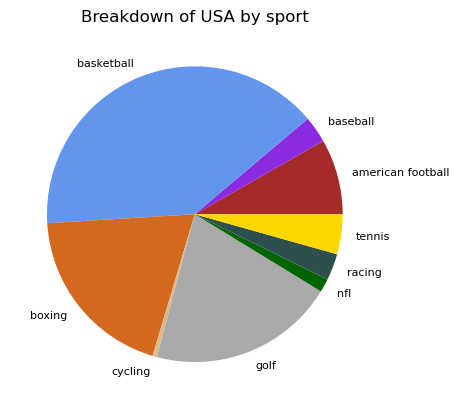

In [278]:
# create new dataframe for each sport where second column is number us has

colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]

usa_density_per_sport = df.loc[df['nationality'] == 'USA'].groupby('sport')['nationality'].count()
udps_df = usa_density_per_sport.reset_index()
udps_df = udps_df.rename(columns={'nationality': 'sum_american'})
udps_df

labels = [sport 
          for sport in udps_df["sport"]]

plt.pie(udps_df['sum_american'], labels=labels,
       colors=colors, textprops={"fontsize": 8})
plt.title("Breakdown of USA by sport")
plt.show()

So, it's easy to see that not only does the US champion earnings but basketball is the biggest section in US. This leads to the conclusion that basketball is one of the highest earning sports which we'll test later. At this point, we wanted to see how the US has changed it's involvement over time and what the density is without Americans. 

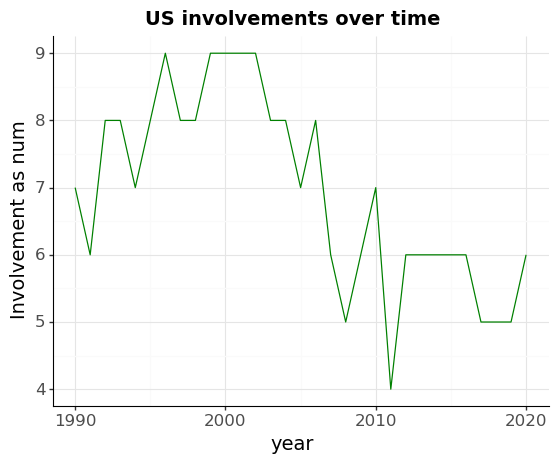

<ggplot: (8766443634095)>

In [279]:
usa_growth = df.loc[df['nationality'] == 'USA'].groupby('year')['sport'].count()
usgw_df = usa_growth.reset_index()
usgw_df = usgw_df.rename(columns={'sport': 'involvement'})
usgw_df

(ggplot(usgw_df, aes(x='year', y='involvement'))
 + geom_line(color='green')
 + labs(title='US involvements over time', x='year', y='Involvement as num')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

Now, let's get down to seeing the density by sports with America not in the mix...

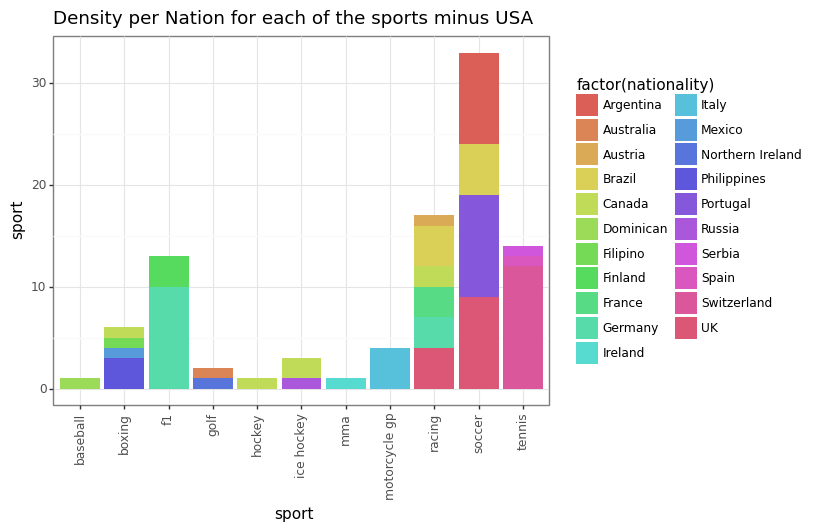

<ggplot: (8766443142717)>

In [280]:
(ggplot(data=df.loc[df['nationality'] != 'USA'], mapping=aes(x="sport", fill="factor(nationality)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Density per Nation for each of the sports minus USA")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

<b>Hypothesis 3:</b>
Which countries are bringing in the percentage of earnings over time

First, let's visualize the total earnings by countries over time. This is important to see how the numbers are changing by countries in total.

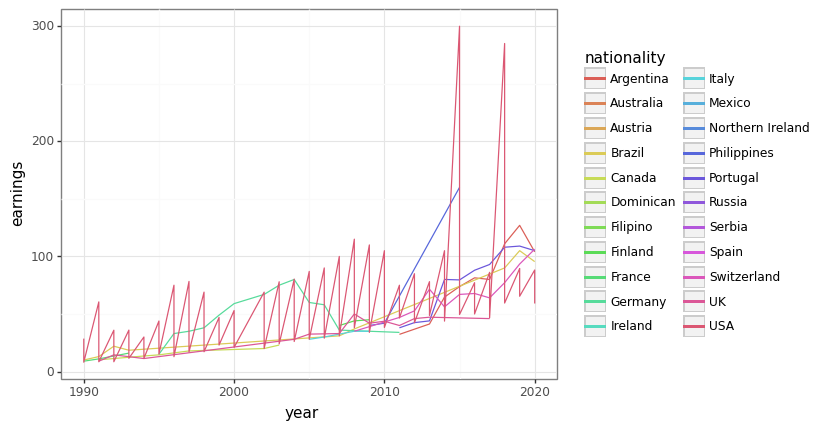

<ggplot: (8766443950213)>

In [281]:
(ggplot(data=df, mapping=aes(x='year', y='earnings', color='nationality'))+
 geom_line()+
 theme_bw())


Wow, that's fascinating for a few reasons. First of all, the US is very shifty, constantly going from higher years to lower years on earnings and other countries tend to change at more constant factors. <br>Let's display one without the United States

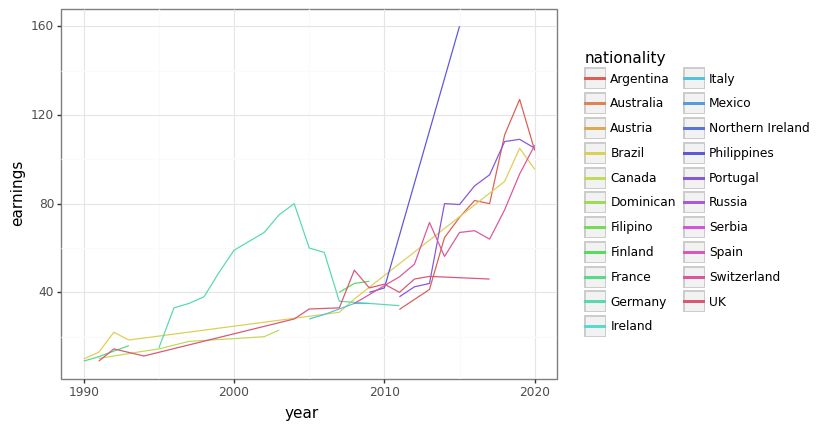

<ggplot: (8766444526499)>

In [282]:
(ggplot(data=df.loc[df['nationality'] != 'USA'], mapping=aes(x='year', y='earnings', color='nationality'))+
 geom_line()+
 theme_bw())


Again, I'm curious about what portion of earnings is brought in by the United States. Let's figure this out by creating a bar graph on total earnings by countries.

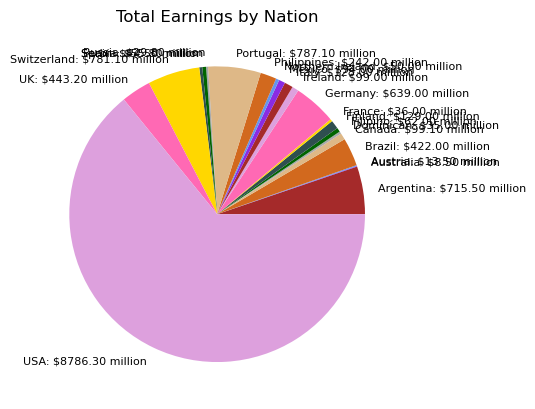

In [283]:
colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]

country_density = df.groupby('nationality')['earnings'].sum()
cydy_df = country_density.reset_index()
# udps_df = udps_df.rename(columns={'nationality': 'sum_american'})
cydy_df


labels = [f"{country}: ${earnings:.2f} million" 
          for country, earnings in zip(cydy_df["nationality"], 
                                    cydy_df["earnings"])]

plt.pie(cydy_df['earnings'], labels=labels,
       colors=colors, textprops={"fontsize": 8})
plt.title("Total Earnings by Nation")
plt.show()

Wow, that's a lot in the US and for the rest it's incredibly hard to see. Let's try this without the USA.

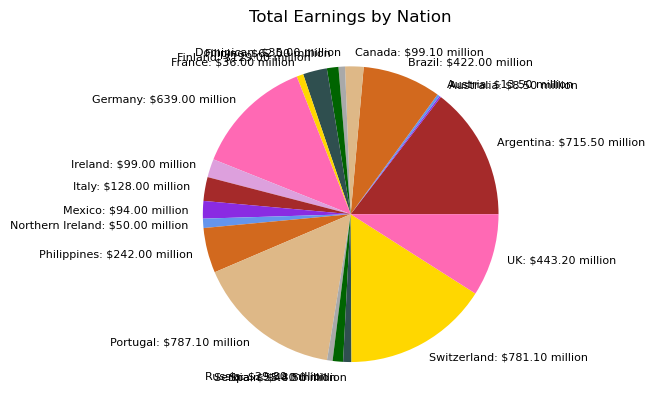

In [284]:
colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]

country_density = df.loc[df['nationality'] != 'USA'].groupby('nationality')['earnings'].sum()
cydy_df = country_density.reset_index()
# udps_df = udps_df.rename(columns={'nationality': 'sum_american'})
cydy_df


labels = [f"{country}: ${earnings:.2f} million" 
          for country, earnings in zip(cydy_df["nationality"], 
                                    cydy_df["earnings"])]

plt.pie(cydy_df['earnings'], labels=labels,
       colors=colors, textprops={"fontsize": 8})
plt.title("Total Earnings by Nation")
plt.show()

This is still incredibly hard to see. So let's try one more method to do this

### FUN Finding
Are there any countries for which the US did not have a member in the top earnings?

In [285]:
cpy_df
lst_years = cpy_df['year']
lst_unique_yrs = []
for i in lst_years:
    if(i not in lst_unique_yrs):
        lst_unique_yrs.append(i)

    
lst_us_not_in = []
for i in lst_unique_yrs:
    lst_nations = (cpy_df.loc[cpy_df['year'] == i])['nationality']
    
    usa_in = False
    for j in lst_nations:
        if(j == 'USA'):
            usa_in = True
            
    if(usa_in != True):
        lst_us_not_in.append(i)
        

print(lst_us_not_in)

[]


This indicates clearly that the United States is involved in the highest earnings of each year, and is a powerhouse of this.

### Analysis of Findings

There's a lot to take from all of this data. In a big part, we see the dominance of the United States sports scene, involved in every year, and in a major way. However, we also see a pick up in the diversity of nations both in the amount of people on the board and their earnings indicating that there is a possibility that sports are becoming more globally visible and powerful. Finally, we've also seen how sports are really involved in their nations. Some sports are solely in one nation and others are diversified. This leans to the interesting possibility that sports really are liked by different areas of the world. Canada and Russia dominate in Ice Hockey so it's not a surprise that they dominate in earnings just like the USA with basketball. However, other sports like racing and soccer seem to have a very global appeal. Very interesting.